In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/GrzegorzPus/Adidas-US-Sales-Analysis/main/Adidas%20US%20Sales%20Dataset.csv')
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store


In [4]:
df = df[df['Units Sold'] != 0]

In [5]:
df['Invoice Date'] = pd.to_datetime(df['Invoice Date'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9644 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9644 non-null   object        
 1   Retailer ID       9644 non-null   int64         
 2   Invoice Date      9644 non-null   datetime64[ns]
 3   Region            9644 non-null   object        
 4   State             9644 non-null   object        
 5   City              9644 non-null   object        
 6   Product           9644 non-null   object        
 7   Price per Unit    9644 non-null   float64       
 8   Units Sold        9644 non-null   int64         
 9   Total Sales       9644 non-null   float64       
 10  Operating Profit  9644 non-null   float64       
 11  Operating Margin  9644 non-null   float64       
 12  Sales Method      9644 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(6)
memory usage: 1.0+ MB


The dataset has been cleaned of errors and is now ready for analysis.

<br>

## Retailer Analysis

In [7]:
df['Retailer'].groupby(df['Retailer']).count()

Retailer
Amazon            949
Foot Locker      2633
Kohl's           1030
Sports Direct    2032
Walmart           626
West Gear        2374
Name: Retailer, dtype: int64

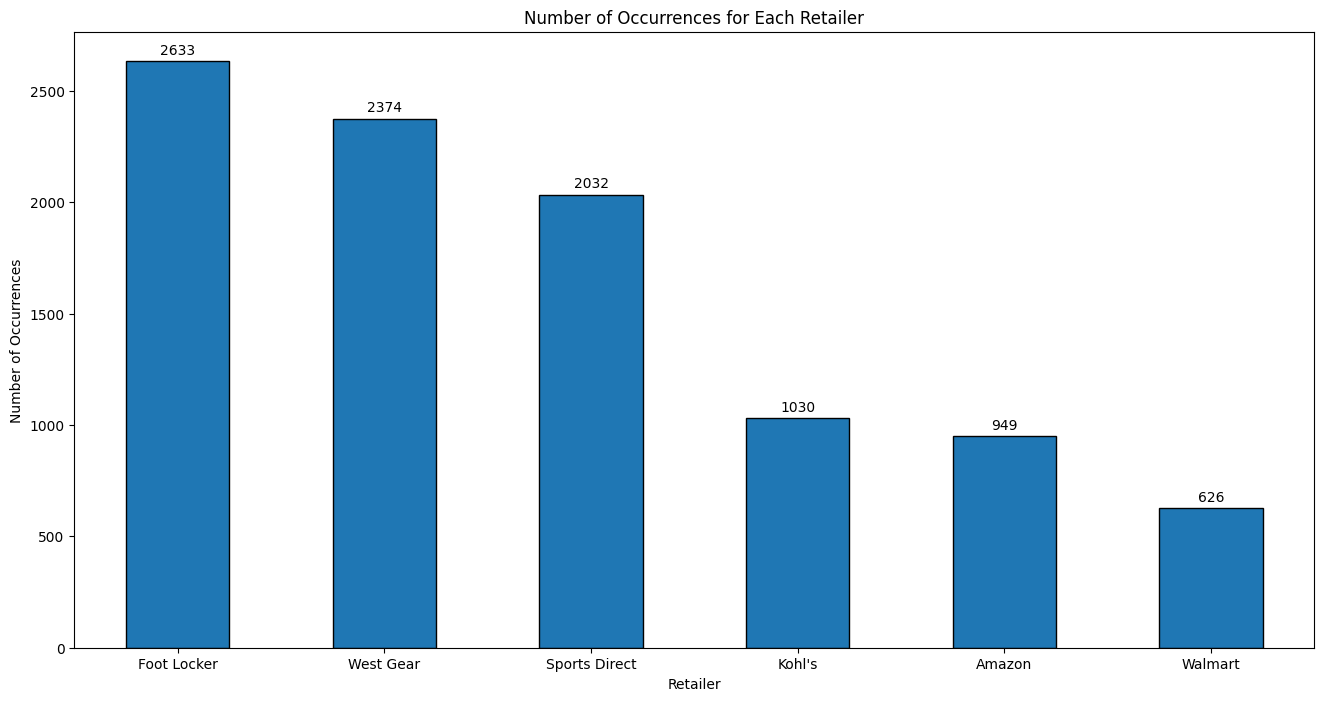

In [8]:
plt.figure(figsize=(16, 8))
bars = df['Retailer'].value_counts().plot(kind='bar', edgecolor='black')
plt.title('Number of Occurrences for Each Retailer')
plt.xlabel('Retailer')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=360)
for bar in bars.patches:
    plt.annotate(format(bar.get_height(), '.0f'),
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                 ha='center', va='center', xytext=(0, 8),
                 textcoords='offset points', fontsize=10, color='black')
plt.show()

The chart includes six retailers: Foot Locker, West Gear, Sports Direct, Kohl's, Amazon, and Walmart. **Foot Locker** has the highest number of occurrences at 2,637, followed by West Gear with 2,374 occurrences, and Sports Direct with 2,032 occurrences. Kohl's shows 1,030 occurrences, Amazon has 949 occurrences, and Walmart has the lowest number of occurrences at 626. From this chart, we can conclude that Foot Locker is the retailer with the most frequent representation of Adidas products in the dataset, suggesting it may have a significant partnership or emphasis on Adidas merchandise. On the other hand, Walmart has the fewest occurrences, indicating it is the least represented retailer for Adidas products in the dataset. The three most represented retailers (Foot Locker, West Gear, Sports Direct) dominate the dataset, each having more than 2,000 occurrences, while the others are below 1,100 occurrences.

<br>

### Average Price per Unit for Each Retailer

In [9]:
df.groupby('Retailer')['Price per Unit'].agg(['mean', 'min', 'median', 'std', 'max']).round(2)

,mean,min,median,std,max
Retailer,,,,,
Amazon,48.76,19.0,50.0,11.83,80.0
Foot Locker,44.81,9.0,45.0,13.53,105.0
Kohl's,44.61,9.0,45.0,11.81,75.0
Sports Direct,42.05,7.0,41.0,12.86,95.0
Walmart,47.18,8.0,45.0,18.22,110.0
West Gear,46.74,7.0,46.0,17.69,110.0


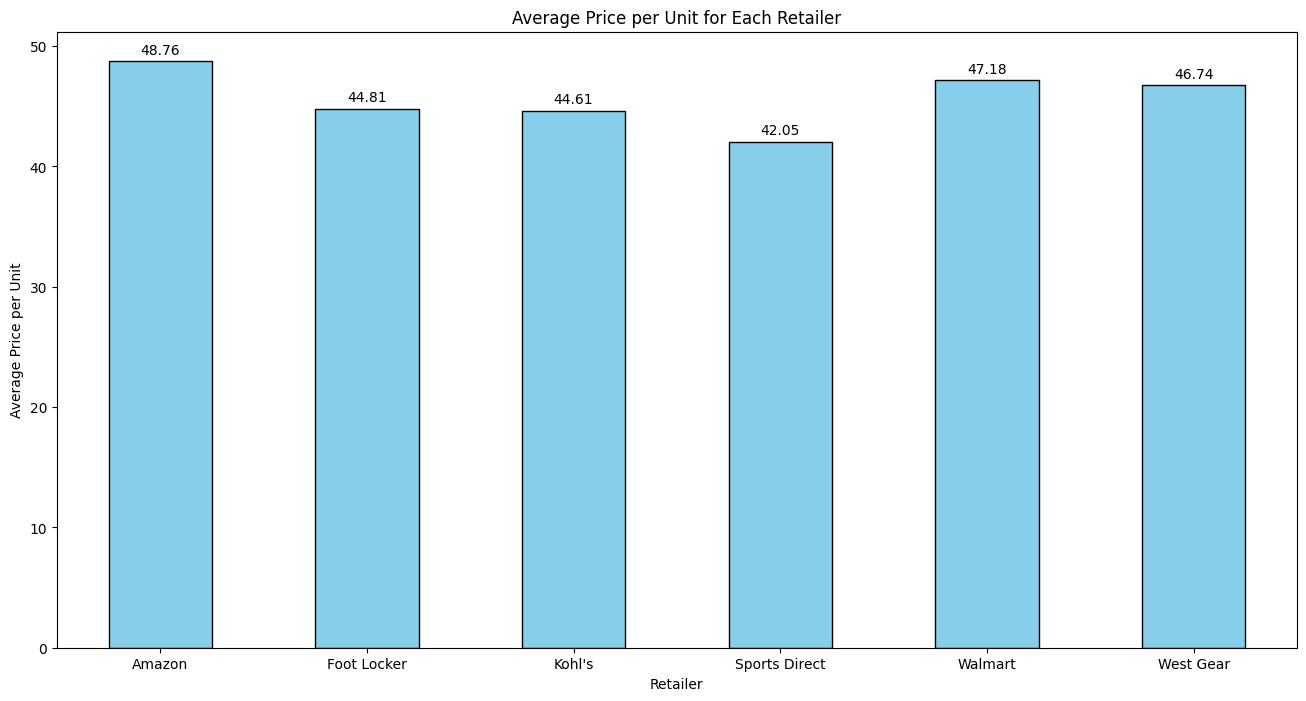

In [10]:
plt.figure(figsize=(16, 8))
bars = df.groupby('Retailer')['Price per Unit'].mean().round(2).plot(kind='bar', edgecolor='black', color='skyblue')
plt.title('Average Price per Unit for Each Retailer')
plt.xlabel('Retailer')
plt.ylabel('Average Price per Unit')
plt.xticks(rotation=360)

for bar in bars.patches:
    plt.annotate(f'{bar.get_height():.2f}',
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                 ha='center', va='center', xytext=(0, 8),
                 textcoords='offset points', fontsize=10, color='black')

plt.show()

The highest average unit price is observed at Amazon, where it stands at $48.76. Following this, Foot Locker offers Adidas products at an average unit price of $44.81, and Kohl's has a similar average price of $44.61. Sports Direct stands out with the lowest average unit price, which is $42.05. Walmart, on the other hand, has an average unit price of $47.18, making it one of the more expensive retailers, similar to West Gear, where the average price is $46.74. The chart suggests that Amazon and Walmart have the highest average prices, potentially indicating a focus on higher-end products or higher margins. In contrast, Sports Direct offers the most affordable prices, possibly targeting budget-conscious consumers. Foot Locker and Kohl's have very similar average prices, which might indicate that they are competing for a similar market segment. Overall, the chart reveals diverse pricing strategies among the retailers, ranging from premium pricing to more affordable options.

<br>

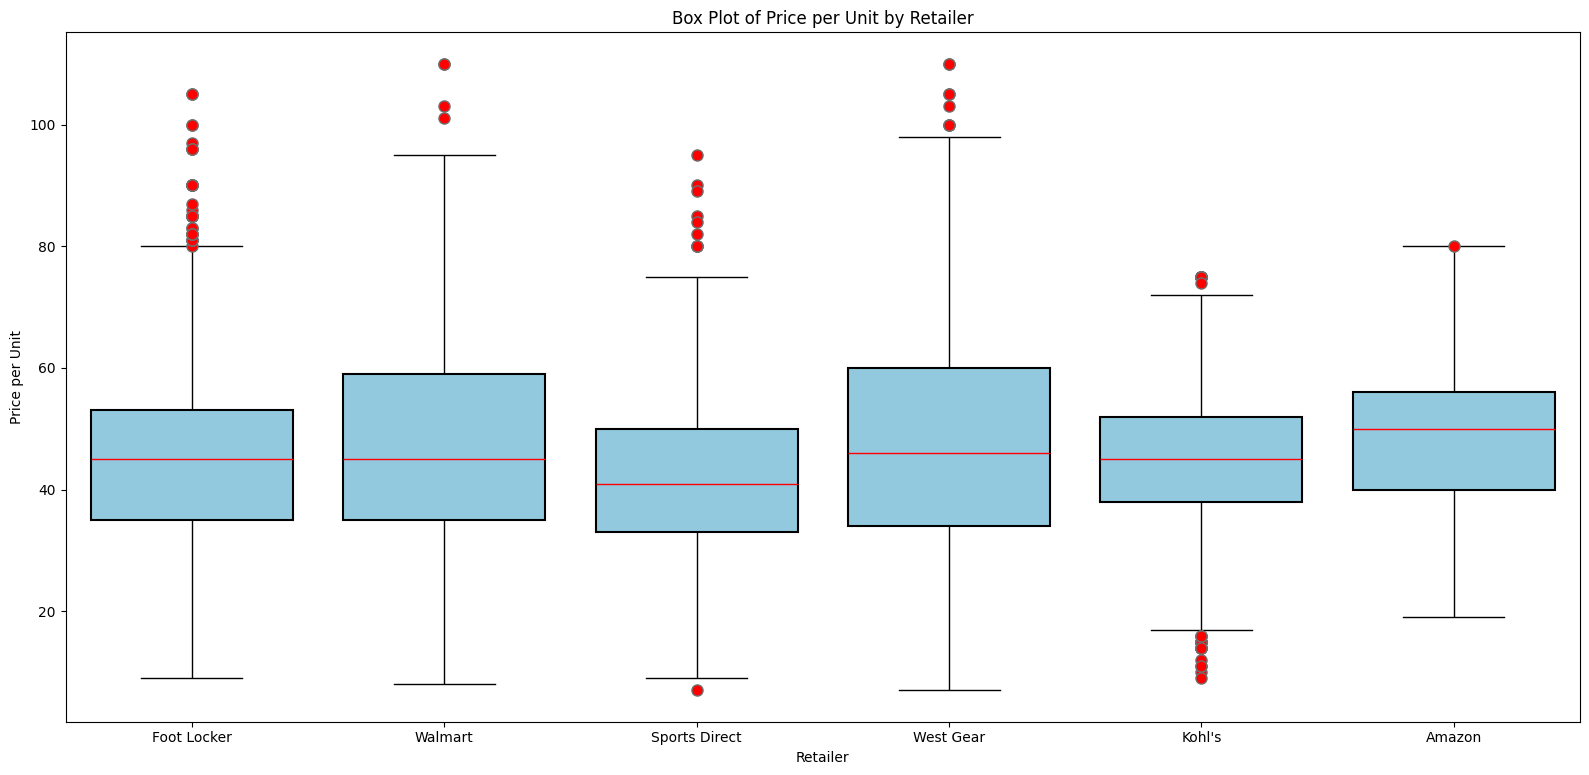

In [11]:
plt.figure(figsize=(16, 8))
boxplot = sns.boxplot(x='Retailer', y='Price per Unit', data=df, hue='Retailer',
            palette={'Walmart': "skyblue", "Kohl's": "skyblue", "West Gear": "skyblue", "West Gear": "skyblue", 'Amazon': "skyblue", 'Foot Locker': "skyblue", 'Sports Direct': "skyblue"},
            boxprops=dict(edgecolor='black'),
            medianprops=dict(color='red'),
            whiskerprops=dict(color='black'),
            capprops=dict(color='black'),
            flierprops=dict(markerfacecolor='red', marker='o', markersize=8))

for patch in boxplot.patches:
    patch.set_edgecolor('black')
    patch.set_linewidth(1.5)
    
plt.title('Box Plot of Price per Unit by Retailer')
plt.suptitle('')
plt.xlabel('Retailer')
plt.ylabel('Price per Unit')
plt.tight_layout()
plt.show()

The box plot visualizes the distribution of "Price per Unit" for Adidas products across six different retailers: Foot Locker, Walmart, Sports Direct, West Gear, Kohl's, and Amazon. Each retailer is represented by a separate box plot that illustrates the interquartile range (IQR), the median price, and the presence of outliers.

At Foot Locker, the median price for Adidas products is around 40, with prices generally ranging between approximately 30 and 55. However, there are numerous outliers above 80, indicating that Foot Locker offers several high-priced Adidas items. Walmart shows a similar median price slightly above 40, with the IQR extending from about 30 to 60. Like Foot Locker, Walmart has several outliers above 80, suggesting that some Adidas products are significantly more expensive there as well.

Sports Direct also exhibits a median price close to 40, with an IQR ranging from approximately 30 to 60. This retailer has outliers both above 70 and below 10, indicating that Sports Direct offers some Adidas products at very high and very low prices. West Gear, on the other hand, shows a higher median price near 50, with a more concentrated IQR from about 45 to 70. There are fewer outliers at West Gear, all of which are above 80, suggesting a more standardized pricing approach for Adidas products.

Kohl's has a median price just above 40, with an IQR between 35 and 60. The presence of outliers both below 20 and above 70 suggests a broader range of price variability for Adidas items at Kohl's. Lastly, Amazon displays a median price slightly above 40, with an IQR spanning from about 30 to 60. There is one significant outlier above 90, but overall, Amazon has fewer outliers compared to Foot Locker and Walmart.

In conclusion, the analysis reveals that while the median prices for Adidas products are relatively consistent across these retailers, ranging from 40 to 50, there is considerable variation in pricing, especially at Foot Locker and Walmart, which exhibit a wider range of prices and a higher number of outliers. This suggests that these retailers may offer a broader selection of Adidas products, including both budget-friendly and premium options. West Gear, with its narrower IQR and fewer outliers, appears to have a more consistent pricing strategy for Adidas items.

<br>

### Units Sold by Each Retailer

In [12]:
df.groupby('Retailer')['Units Sold'].agg(['sum', 'mean', 'min', 'median', 'std', 'max']).round(2)

,sum,mean,min,median,std,max
Retailer,,,,,,
Amazon,197990,208.63,13,149.0,169.65,900
Foot Locker,604369,229.54,6,150.0,216.46,1275
Kohl's,287375,279.00,22,197.0,204.68,950
Sports Direct,557640,274.43,22,189.0,219.36,1075
Walmart,206225,329.43,58,241.5,252.67,1200
West Gear,625262,263.38,7,184.0,207.86,1150


<br>

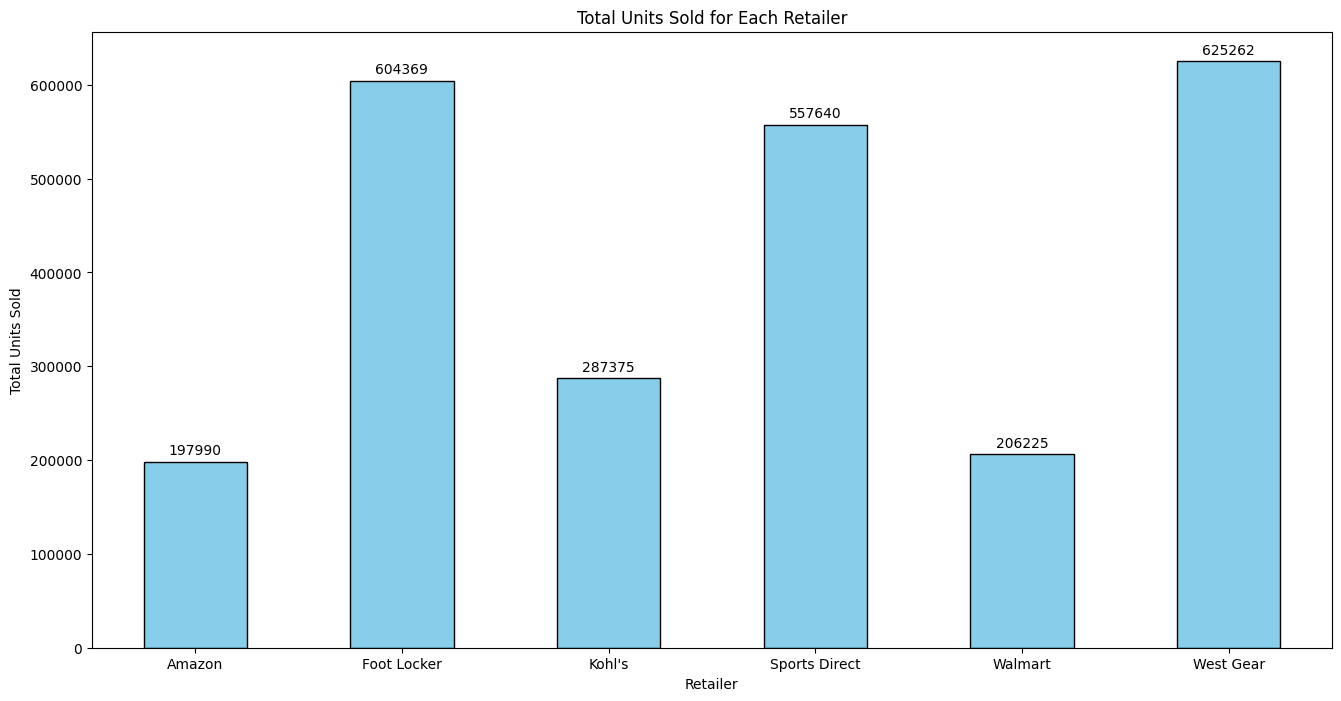

In [15]:
plt.figure(figsize=(16, 8))
bars = df.groupby('Retailer')['Units Sold'].sum().plot(kind='bar', edgecolor='black', color='skyblue')
plt.title('Total Units Sold for Each Retailer')
plt.xlabel('Retailer')
plt.ylabel('Total Units Sold')
plt.xticks(rotation=360)

for bar in bars.patches:
    plt.annotate(f'{bar.get_height():.0f}',
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                 ha='center', va='center', xytext=(0, 8),
                 textcoords='offset points', fontsize=10, color='black')

plt.show()

The bar chart illustrates the total number of units sold for Adidas products across six different retailers: 

Foot Locker and West Gear lead in total Adidas units sold, with Foot Locker selling 604369 units and West Gear slightly higher at 625262 units. These two retailers have significantly higher sales volumes compared to the others. Sports Direct follows with 557640 units sold, making it the third-highest retailer in terms of sales.

Kohl's has sold 287375 units, which is a noticeable drop compared to the top three retailers, but still higher than Amazon and Walmart. Amazon and Walmart have the lowest sales figures, with Amazon selling 197990 units and Walmart selling 206225 units. Despite their global reach, both Amazon and Walmart's sales of Adidas products are substantially lower than those of Foot Locker, West Gear, and Sports Direct.

In summary, the chart indicates that West Gear and Foot Locker are the most successful retailers in terms of Adidas product sales, while Amazon and Walmart sell significantly fewer units, suggesting a possible difference in product focus, customer base, or sales strategy among the retailers.

<br>

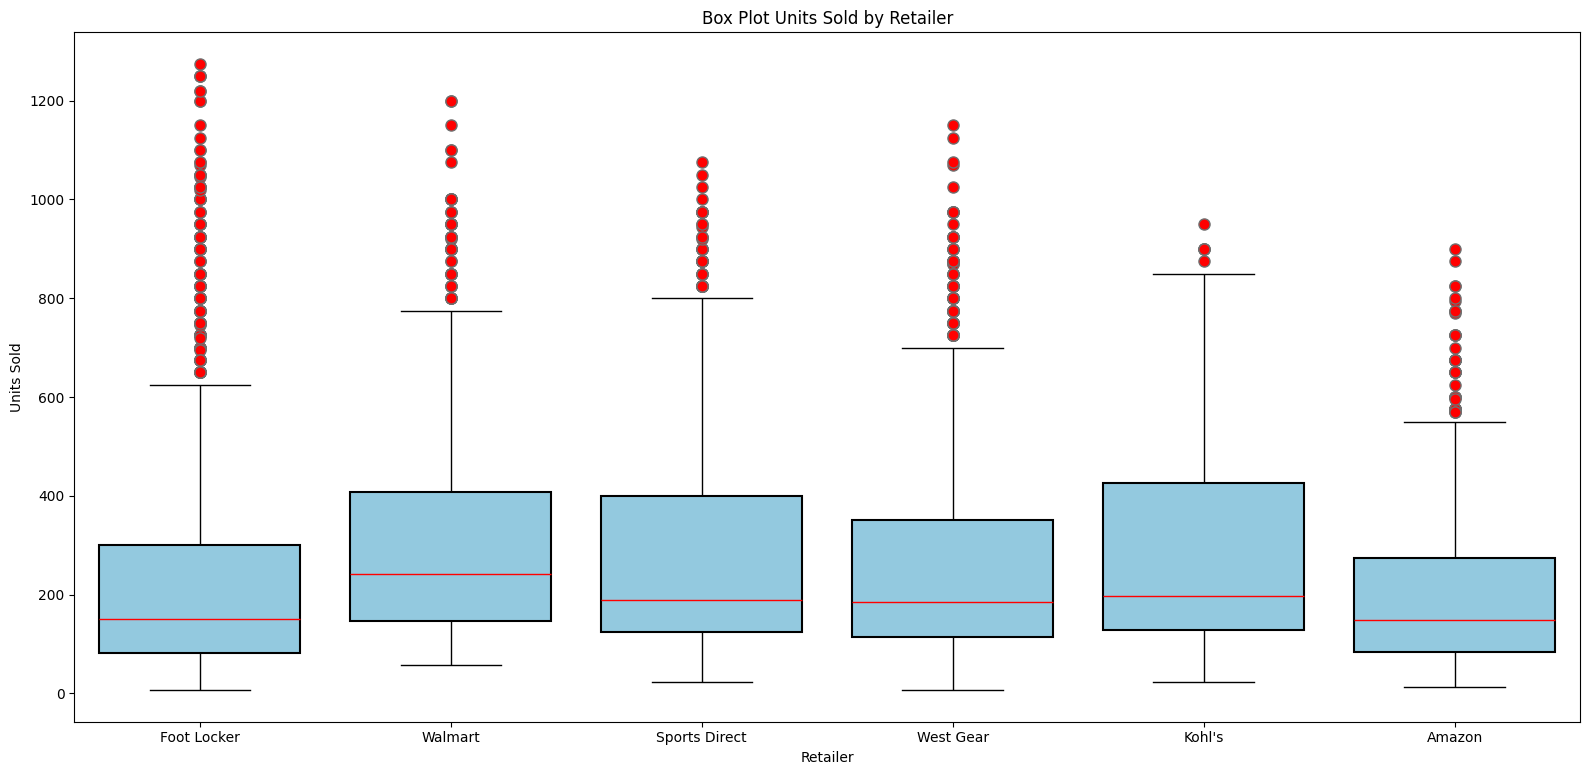

In [16]:
plt.figure(figsize=(16, 8))
boxplot = sns.boxplot(x='Retailer', y='Units Sold', data=df, hue='Retailer',
            palette={'Walmart': "skyblue", "Kohl's": "skyblue", "West Gear": "skyblue", "West Gear": "skyblue", 'Amazon': "skyblue", 'Foot Locker': "skyblue", 'Sports Direct': "skyblue"},
            boxprops=dict(edgecolor='black'),
            medianprops=dict(color='red'),
            whiskerprops=dict(color='black'),
            capprops=dict(color='black'),
            flierprops=dict(markerfacecolor='red', marker='o', markersize=8))

for patch in boxplot.patches:
    patch.set_edgecolor('black')
    patch.set_linewidth(1.5)
    
plt.title('Box Plot Units Sold by Retailer')
plt.suptitle('')
plt.xlabel('Retailer')
plt.ylabel('Units Sold')
plt.tight_layout()
plt.show()

At Foot Locker, the median number of units sold is around 200 with the interquartile range (IQR) extending from approximately 100 to 400 units. However, Foot Locker has a large number of outliers above 600 with some reaching up to 1200 units sold, indicating that certain Adidas products are much more popular or sell in higher volumes at this retailer.

Walmart shows a similar median around 200 units, with the IQR ranging from about 100 to 400 units. Like Foot Locker, Walmart also has many outliers, though they extend slightly lower, up to about 1000 units sold. This suggests that while Walmart also experiences high-volume sales for specific Adidas products, the upper range is slightly less extreme compared to Foot Locker.

Sports Direct has a median around 200 units as well, with a slightly wider IQR from approximately 50 to 400 units. The outliers here are fewer in number but still reach up to about 1000 units sold. West Gear shows a similar pattern with a median near 200 units, an IQR from 50 to 350 units, and outliers reaching up to 1000 units.

Kohl's exhibits a median just above 200 units, with the IQR ranging from around 100 to 400 units. The outliers at Kohl's are less numerous but still significant, extending up to about 700 units sold. Finally, Amazon displays a median of around 150 units sold, with a narrower IQR from 50 to 300 units. The outliers at Amazon are less extreme, reaching up to about 500 units sold.

In summary, while the median units sold for Adidas products are relatively consistent across these retailers, typically around 200 units, there is substantial variability in the upper range of sales. Foot Locker and Walmart, in particular, have a higher number of extreme outliers, suggesting that some Adidas products are much more popular and sell in significantly larger quantities at these retailers compared to others.

<br>

### Total Sales by Each Retailer

In [18]:
df.groupby('Retailer')['Total Sales'].agg(['sum', 'mean', 'min', 'median', 'std', 'max']).round(2)

,sum,mean,min,median,std,max
Retailer,,,,,,
Amazon,77698912.0,81874.51,416.0,7876.0,113390.21,618750.0
Foot Locker,220094720.0,83590.85,160.0,9490.0,134115.90,765000.0
Kohl's,102114753.0,99140.54,520.0,9487.0,130908.22,520000.0
Sports Direct,182470997.0,89798.72,528.0,8135.5,133219.36,698750.0
Walmart,74558410.0,119102.89,880.0,11271.0,185747.17,825000.0
West Gear,242964333.0,102343.86,203.0,10754.5,156931.14,825000.0


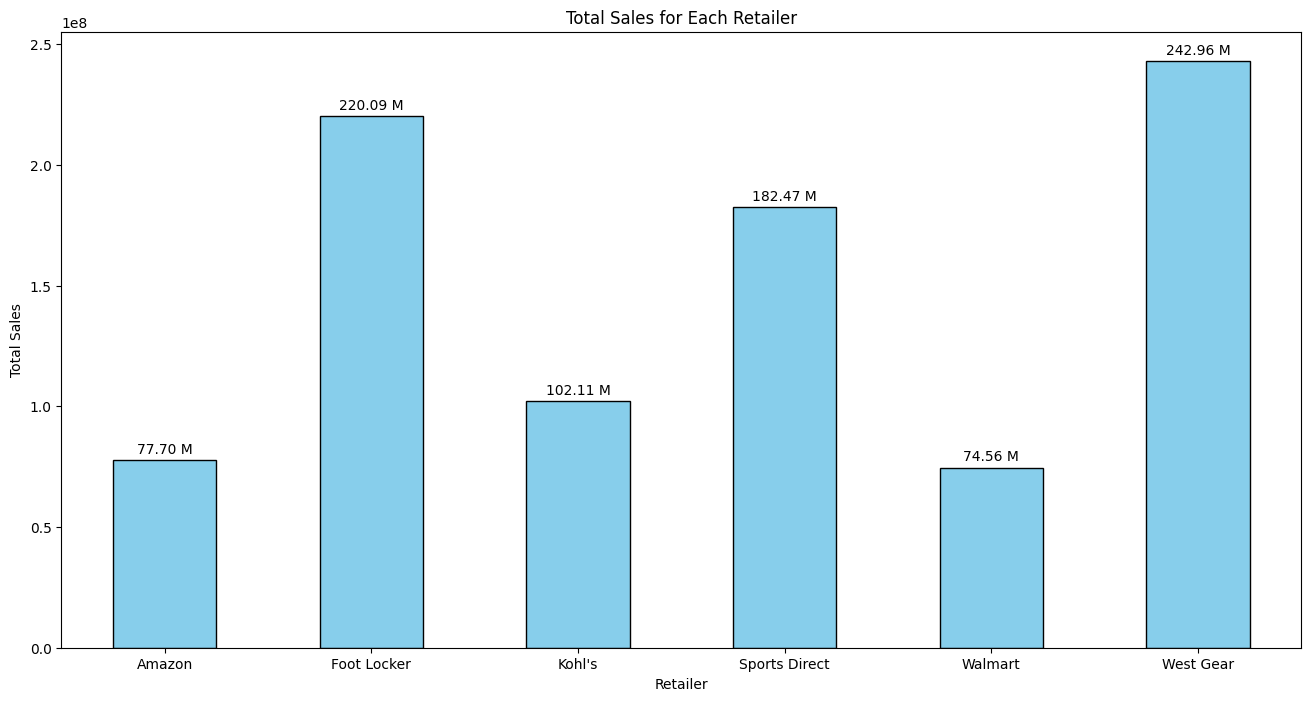

In [28]:
plt.figure(figsize=(16, 8))
bars = df.groupby('Retailer')['Total Sales'].sum().plot(kind='bar', edgecolor='black', color='skyblue')
plt.title('Total Sales for Each Retailer')
plt.xlabel('Retailer')
plt.ylabel('Total Sales')
plt.xticks(rotation=360)

for bar in bars.patches:
    plt.annotate(f'{bar.get_height()/1000000:.2f} M',
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                 ha='center', va='center', xytext=(0, 8),
                 textcoords='offset points', fontsize=10, color='black')

plt.show()

Amazon recorded total sales of $77.70 million, positioning it as one of the lower performers among the retailers. Foot Locker achieved $220.09 million in sales, making it one of the top performers. Kohl's reported sales of $102.11 million, placing it in the mid-range. Sports Direct showed strong performance with sales of $182.47 million, slightly below Foot Locker and West Gear. Walmart had the lowest sales, with a total of $74.56 million. West Gear led the group with the highest sales at $242.96 million, making it the top retailer for Adidas in this comparison.

The analysis reveals that West Gear and Foot Locker are the leading retailers in terms of sales, with West Gear slightly outperforming Foot Locker. These two companies have significantly higher sales compared to the others, indicating a strong market presence and possibly more effective sales strategies or larger customer bases for Adidas products. In contrast, Sports Direct and Kohl's are mid-range performers, with substantial sales figures that suggest they are important players in Adidas's retail distribution. Amazon and Walmart, however, recorded the lowest sales, which could suggest that these platforms may not be as strongly associated with Adidas products or face greater competition within their respective marketplaces. Overall, the chart highlights a clear disparity in the performance of different retailers, with a significant gap between the top performers and the rest. The data suggests that Adidas may benefit from focusing on their relationships with West Gear and Foot Locker while exploring potential growth opportunities with Amazon and Walmart.

<br>

### Profit by Each Retailer

In [29]:
df.groupby('Retailer')['Operating Profit'].agg(['sum', 'mean', 'min', 'median', 'std', 'max']).round(2)

,sum,mean,min,median,std,max
Retailer,,,,,,
Amazon,28818503.31,30367.23,166.40,3931.20,44192.50,290625.0
Foot Locker,80722124.81,30657.85,75.20,4336.50,51219.45,382500.0
Kohl's,36811252.58,35739.08,249.60,4166.24,48292.45,236250.0
Sports Direct,74332954.96,36581.18,227.04,4145.04,58018.48,341250.0
Walmart,25782052.61,41185.39,403.20,4822.58,65699.00,390000.0
West Gear,85667873.18,36085.88,93.38,4607.95,56359.73,341250.0


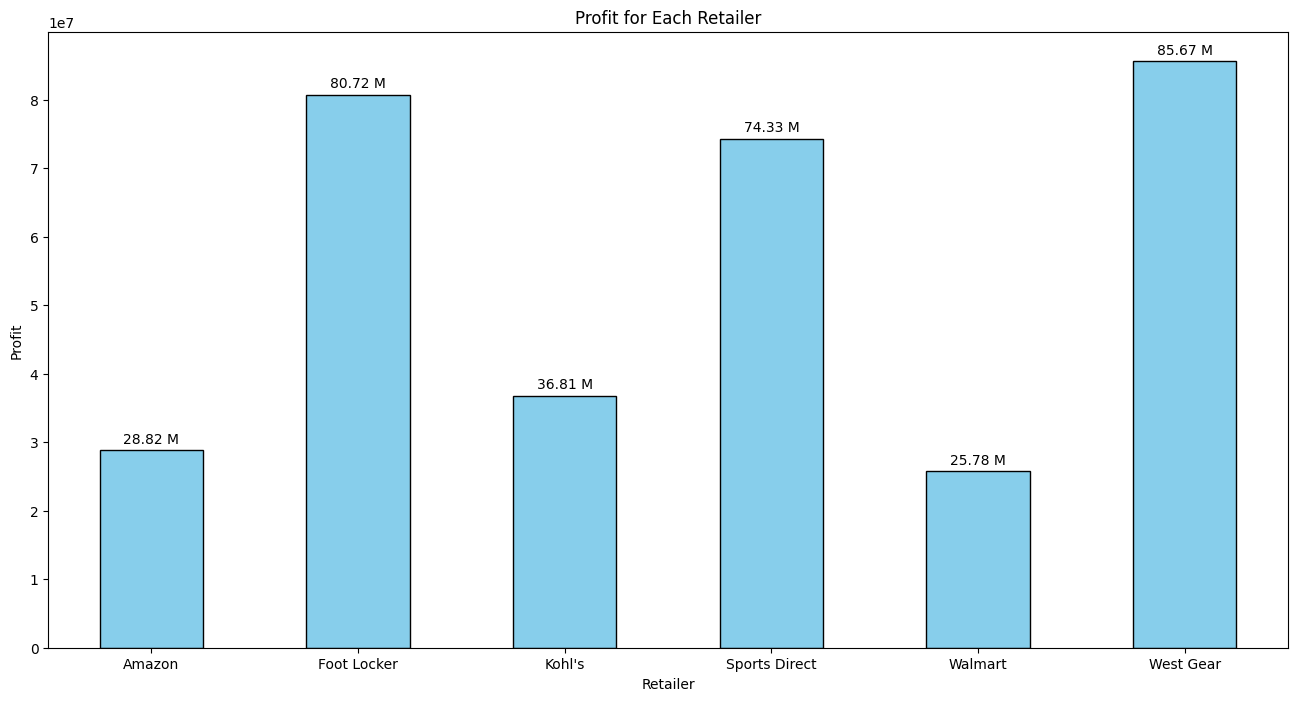

In [30]:
plt.figure(figsize=(16, 8))
bars = df.groupby('Retailer')['Operating Profit'].sum().plot(kind='bar', edgecolor='black', color='skyblue')
plt.title('Profit for Each Retailer')
plt.xlabel('Retailer')
plt.ylabel('Profit')
plt.xticks(rotation=360)

for bar in bars.patches:
    plt.annotate(f'{bar.get_height()/1000000:.2f} M',
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                 ha='center', va='center', xytext=(0, 8),
                 textcoords='offset points', fontsize=10, color='black')

plt.show()

From the chart, it is evident that West Gear has the highest profit, standing at 85.67 million dollars. It is closely followed by Foot Locker, which has a profit of 80.72 million dollars. Sports Direct also shows a significant profit of 74.33 million dollars. In contrast, Amazon, Kohl's, and Walmart have lower profits, with Amazon earning 28.82 million dollars, Kohl's 36.81 million dollars, and Walmart having the lowest profit of 25.78 million dollars.

The key takeaway from this chart is that West Gear, Foot Locker, and Sports Direct are the top performers in terms of profit among the retailers listed. They have profits substantially higher than Amazon, Kohl's, and Walmart, which have relatively similar but lower profits. This disparity in profits suggests that West Gear, Foot Locker, and Sports Direct may have more effective business strategies, a larger market share, or better cost management compared to the other retailers.

<br>

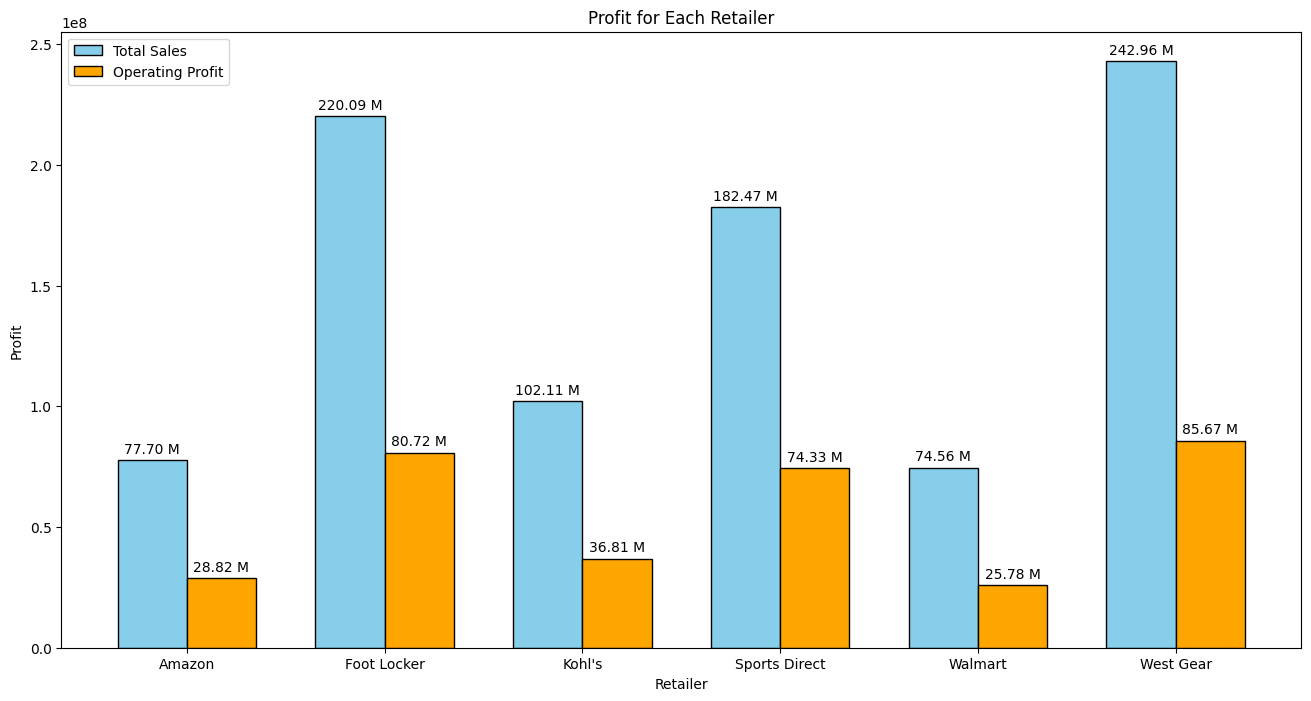

In [34]:
profit_by_retailer = df.groupby('Retailer')[['Total Sales', 'Operating Profit']].sum()

plt.figure(figsize=(16, 8))
bar_width = 0.35

bars1 = plt.bar(np.arange(len(profit_by_retailer)), profit_by_retailer['Total Sales'], bar_width, label='Total Sales', edgecolor='black', color='skyblue')
bars2 = plt.bar(np.arange(len(profit_by_retailer)) + bar_width, profit_by_retailer['Operating Profit'], bar_width, label='Operating Profit', edgecolor='black', color='orange')

plt.title('Profit for Each Retailer')
plt.xlabel('Retailer')
plt.ylabel('Profit')
plt.xticks(np.arange(len(profit_by_retailer)) + bar_width / 2, profit_by_retailer.index, rotation=360)
plt.legend()

for bar in bars1:
    plt.annotate(f'{bar.get_height()/1000000:.2f} M',
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                 ha='center', va='center', xytext=(0, 8),
                 textcoords='offset points', fontsize=10, color='black')

for bar in bars2:
    plt.annotate(f'{bar.get_height()/1000000:.2f} M',
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                 ha='center', va='center', xytext=(0, 8),
                 textcoords='offset points', fontsize=10, color='black')

plt.show()


The chart reveals that West Gear has the highest total sales at 242.96 million dollars, followed by Foot Locker with 220.09 million dollars, and Sports Direct with 182.47 million dollars. In contrast, Amazon and Walmart have much lower total sales, at 77.70 million dollars and 74.56 million dollars, respectively. Kohl's has a moderate total sales figure of 102.11 million dollars. 

In terms of operating profit, West Gear also leads with 85.67 million dollars, closely followed by Foot Locker at 80.72 million dollars. Sports Direct shows a strong operating profit of 74.33 million dollars, while Kohl's, Amazon, and Walmart have significantly lower operating profits, with Kohl's at 36.81 million dollars, Amazon at 28.82 million dollars, and Walmart at 25.78 million dollars.

This comparison between total sales and operating profit highlights that while all retailers have substantial sales, there is a significant variance in how effectively these sales are converted into operating profits. West Gear and Foot Locker are particularly noteworthy for their ability to achieve high operating profits relative to their sales, indicating efficient operations or a strong market position. On the other hand, retailers like Amazon and Walmart, despite having significant sales, have relatively lower operating profits, which may suggest higher operating costs or lower margins.

<br>

In [39]:
profit_by_retailer = profit_by_retailer.assign(Profit_Margin = lambda x: x['Operating Profit'] / x['Total Sales']).round(2)
profit_by_retailer

,Total Sales,Operating Profit,Profit_Margin
Retailer,,,
Amazon,77698912.0,28818503.31,0.37
Foot Locker,220094720.0,80722124.81,0.37
Kohl's,102114753.0,36811252.58,0.36
Sports Direct,182470997.0,74332954.96,0.41
Walmart,74558410.0,25782052.61,0.35
West Gear,242964333.0,85667873.18,0.35


Foot Locker and Amazon have a profit margin of 0.37, indicating that for every dollar in sales, they generate 37 cents in operating profit. This margin is consistent across both retailers, suggesting similar levels of operational efficiency. Kohl's has a slightly lower profit margin of 0.36, meaning it generates 36 cents in profit for every dollar of sales, slightly underperforming compared to Foot Locker and Amazon.

Sports Direct stands out with the highest profit margin of 0.41. This suggests that Sports Direct is particularly efficient, earning 41 cents of profit for every dollar in sales, which is significantly higher than the other retailers. This higher margin could be due to better cost management, higher pricing power, or a more profitable product mix.

On the other end of the spectrum, Walmart and West Gear both have the lowest profit margins at 0.35. Despite West Gear having the highest total sales and operating profit, its profit margin is the same as Walmart's, indicating that while West Gear is generating substantial revenue and profit, its efficiency in converting sales into profit is comparable to Walmart, which has much lower sales.

In conclusion, Sports Direct is the most efficient retailer in terms of profit margin, significantly outperforming the others. Foot Locker and Amazon also show strong performance, while Kohl's, Walmart, and West Gear have slightly lower profit margins, indicating room for improvement in operational efficiency or cost management.

<br>

## State and City Analysis

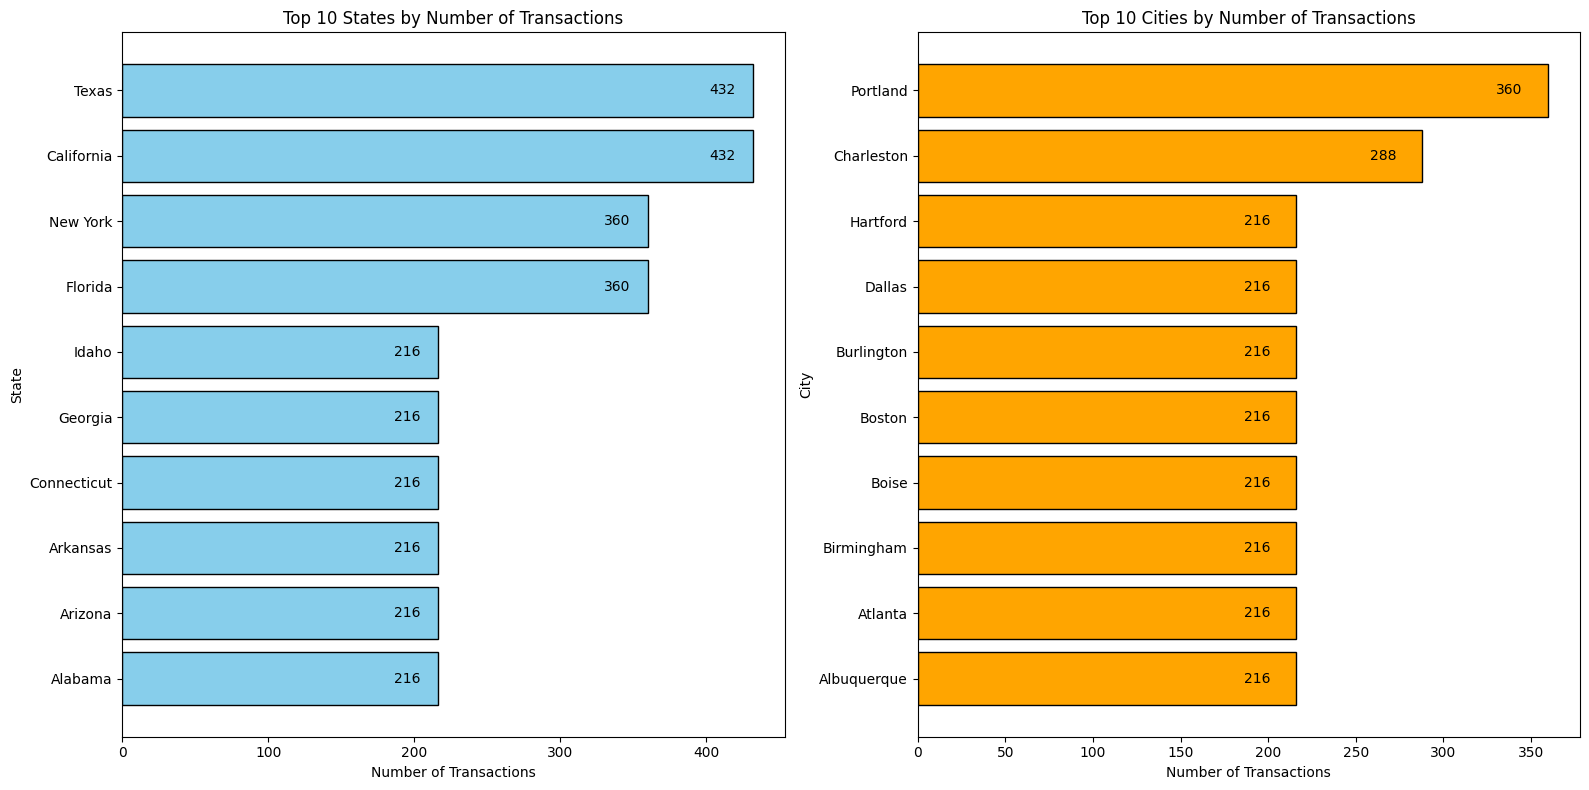

In [55]:
state_counts = df.groupby('State').size().nlargest(10).sort_values(ascending=True)
city_counts = df.groupby('City').size().nlargest(10).sort_values(ascending=True)

fig, axes = plt.subplots(1, 2, figsize=(16, 8))

bars1 = axes[0].barh(state_counts.index, state_counts.values, color='skyblue', edgecolor='black')
axes[0].set_title('Top 10 States by Number of Transactions')
axes[0].set_xlabel('Number of Transactions')
axes[0].set_ylabel('State')

for bar in bars1:
    width = bar.get_width()
    axes[0].text(width - 30, bar.get_y() + bar.get_height() / 2,
                 f'{width:,}', ha='left', va='center', fontsize=10, color='black')


bars2 = axes[1].barh(city_counts.index, city_counts.values, color='orange', edgecolor='black')
axes[1].set_title('Top 10 Cities by Number of Transactions')
axes[1].set_xlabel('Number of Transactions')
axes[1].set_ylabel('City')

for bar in bars2:
    width = bar.get_width()
    axes[1].text(width - 30, bar.get_y() + bar.get_height() / 2,
                 f'{width:,}', ha='left', va='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()

In the left chart, Texas and California lead with 432 transactions each, making them the states with the highest number of transactions. They are followed by New York and Florida, each with 360 transactions. The remaining six states—Idaho, Georgia, Connecticut, Arkansas, Arizona and Alabama—each have 216 transactions. The bars for Texas and California are the longest, clearly indicating their higher transaction volumes compared to the other states.

In the right chart, Portland stands out as the city with the most transactions at 360. Charleston follows with 288 transactions. The other eight cities—Hartford, Dallas, Burlington, Boston, Boise, Birmingham, Atlanta, and Albuquerque—each have 216 transactions. Portland's bar is the longest, emphasizing its leading position among the cities, while Charleston has the second longest bar showing a relatively high number of transactions as well.

The charts reveal that transactions are concentrated in certain states and cities with Texas and California being the most active states, and Portland being the most active city. The equal transaction numbers in several states and cities suggest a significant concentration of activity, but also indicate that while certain areas lead, others are relatively uniform in their transaction counts.

<br>

### Average Price per Unit in different State and Cities

In [56]:
df.groupby('State')['Price per Unit'].agg(['mean', 'min', 'median', 'std', 'max']).round(2)

,mean,min,median,std,max
State,,,,,
Alabama,36.69,7.0,36.0,13.58,70.0
Alaska,57.22,33.0,55.5,9.61,80.0
Arizona,45.96,26.0,45.0,9.12,70.0
Arkansas,33.34,8.0,30.0,16.13,75.0
California,49.55,24.0,49.0,10.87,80.0
Colorado,60.09,27.0,61.5,11.96,85.0
Connecticut,43.62,18.0,43.0,11.36,70.0
Delaware,47.41,24.0,50.0,10.69,70.0
Florida,56.69,23.0,55.0,15.59,110.0


In [58]:
df.groupby('City')['Price per Unit'].agg(['mean', 'min', 'median', 'std', 'max']).round(2)

,mean,min,median,std,max
City,,,,,
Albany,50.88,29.0,50.0,9.82,70.0
Albuquerque,50.61,23.0,51.0,11.58,75.0
Anchorage,57.22,33.0,55.5,9.61,80.0
Atlanta,46.81,21.0,47.0,10.58,70.0
Baltimore,44.07,24.0,45.0,9.53,65.0
Billings,45.02,18.0,45.0,7.81,60.0
Birmingham,36.69,7.0,36.0,13.58,70.0
Boise,40.01,14.0,40.0,11.68,65.0
Boston,44.79,22.0,45.0,10.56,70.0


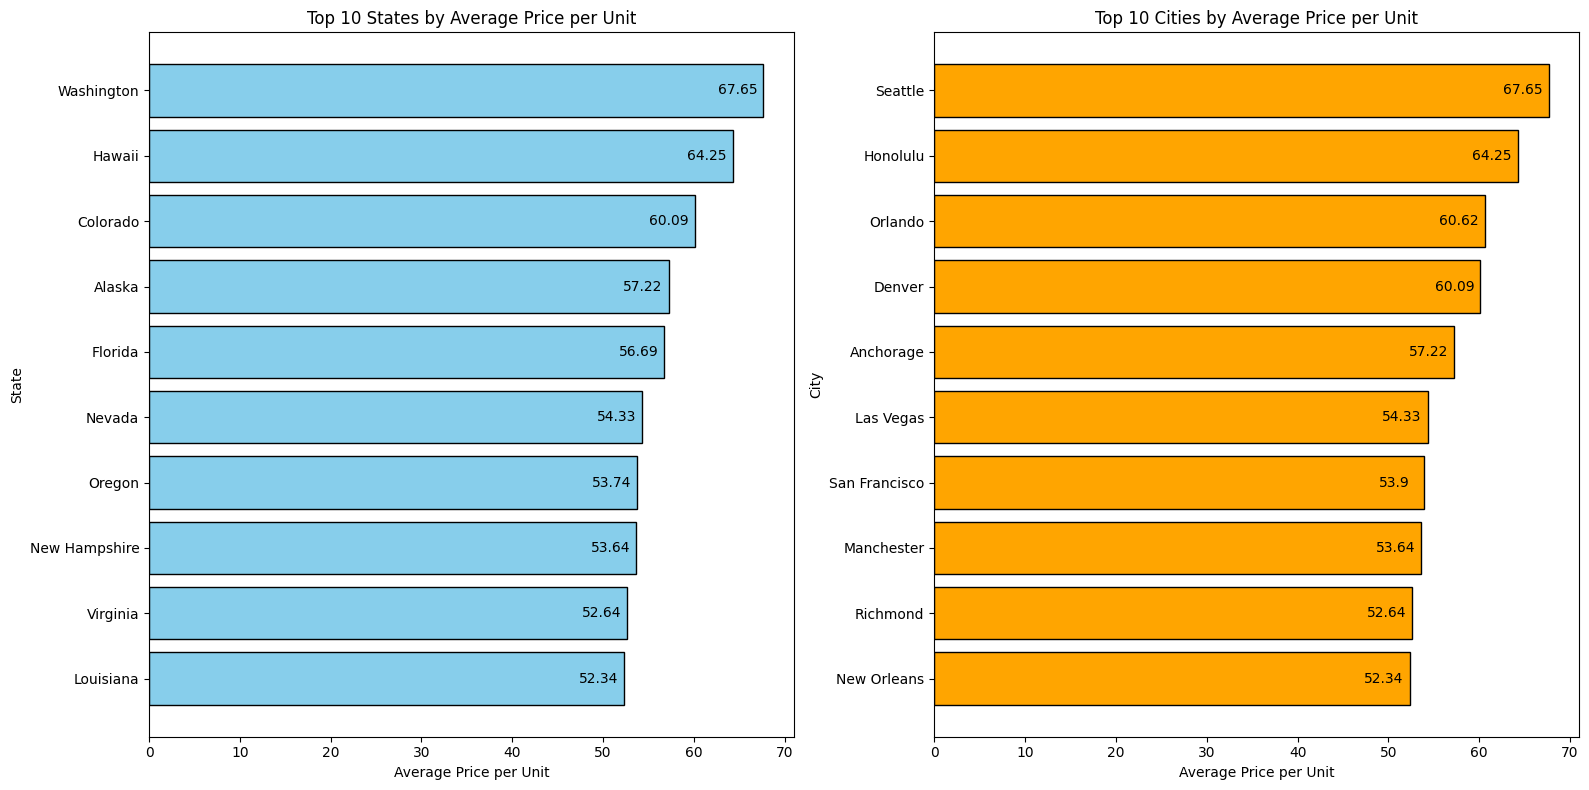

In [63]:
state_avg_price = df.groupby('State')['Price per Unit'].mean().round(2).nlargest(10).sort_values(ascending=True)
city_avg_price = df.groupby('City')['Price per Unit'].mean().round(2).nlargest(10).sort_values(ascending=True)

fig, axes = plt.subplots(1, 2, figsize=(16, 8))

bars1 = axes[0].barh(state_avg_price.index, state_avg_price.values, color='skyblue', edgecolor='black')
axes[0].set_title('Top 10 States by Average Price per Unit')
axes[0].set_xlabel('Average Price per Unit')
axes[0].set_ylabel('State')

for bar in bars1:
    width = bar.get_width()
    axes[0].text(width - 5, bar.get_y() + bar.get_height() / 2,
                 f'{width:,}', ha='left', va='center', fontsize=10, color='black')


bars2 = axes[1].barh(city_avg_price.index, city_avg_price.values, color='orange', edgecolor='black')
axes[1].set_title('Top 10 Cities by Average Price per Unit')
axes[1].set_xlabel('Average Price per Unit')
axes[1].set_ylabel('City')

for bar in bars2:
    width = bar.get_width()
    axes[1].text(width - 5, bar.get_y() + bar.get_height() / 2,
                 f'{width:,}', ha='left', va='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()

In the left chart, Washington leads with the highest average price per unit at $67.65. It is followed by Hawaii at $64.25 and Colorado at $60.09. Other states in the top 10 include Alaska, Florida, Nevada, Oregon, New Hampshire, Virginia, and Louisiana, with average prices ranging from $57.22 to $52.34. The variation in prices indicates a relatively broad range of average unit prices across these top states, with Washington standing out as the most expensive.

On the right side, the city of Seattle has the highest average price per unit at $67.65, which corresponds to the state of Washington. Honolulu follows at $64.25, and Orlando is third at $60.62. Other cities in the list include Denver, Anchorage, Las Vegas, San Francisco, Manchester, Richmond, and New Orleans, with prices ranging from $60.09 to $52.34. Similar to the state chart, Seattle leads significantly in terms of average unit price, while the rest of the cities show a more gradual decrease.

The alignment between the states and their corresponding cities, like Seattle with Washington, and Honolulu with Hawaii, suggests that high unit prices in certain states are driven by the major cities within those states. The charts provide a clear visualization of which states and cities command the highest prices per unit, with notable concentrations in Washington and Hawaii. The comparison also highlights the differences in pricing dynamics across various regions.

<br>

### Units Sold in different State and Cities

In [67]:
df.groupby('State')['Units Sold'].agg(['mean', 'min', 'median', 'std', 'max']).round(2)

,mean,min,median,std,max
State,,,,,
Alabama,293.18,28,203.0,214.39,975
Alaska,213.99,36,161.5,154.83,675
Arizona,217.22,31,145.0,153.98,675
Arkansas,224.39,60,149.0,162.37,775
California,377.97,34,240.5,250.53,1025
Colorado,287.35,39,192.5,193.20,775
Connecticut,160.63,20,112.0,129.97,650
Delaware,210.24,31,159.0,153.64,675
Florida,370.64,26,231.0,280.86,1150


In [68]:
df.groupby('City')['Units Sold'].agg(['mean', 'min', 'median', 'std', 'max']).round(2)

,mean,min,median,std,max
City,,,,,
Albany,397.12,106,344.0,245.60,950
Albuquerque,243.67,53,160.0,171.00,750
Anchorage,213.99,36,161.5,154.83,675
Atlanta,261.07,39,175.0,198.42,1075
Baltimore,144.57,7,107.5,125.94,575
Billings,296.62,56,203.0,191.39,750
Birmingham,293.18,28,203.0,214.39,975
Boise,295.50,63,202.5,211.19,925
Boston,152.29,27,104.5,123.97,600


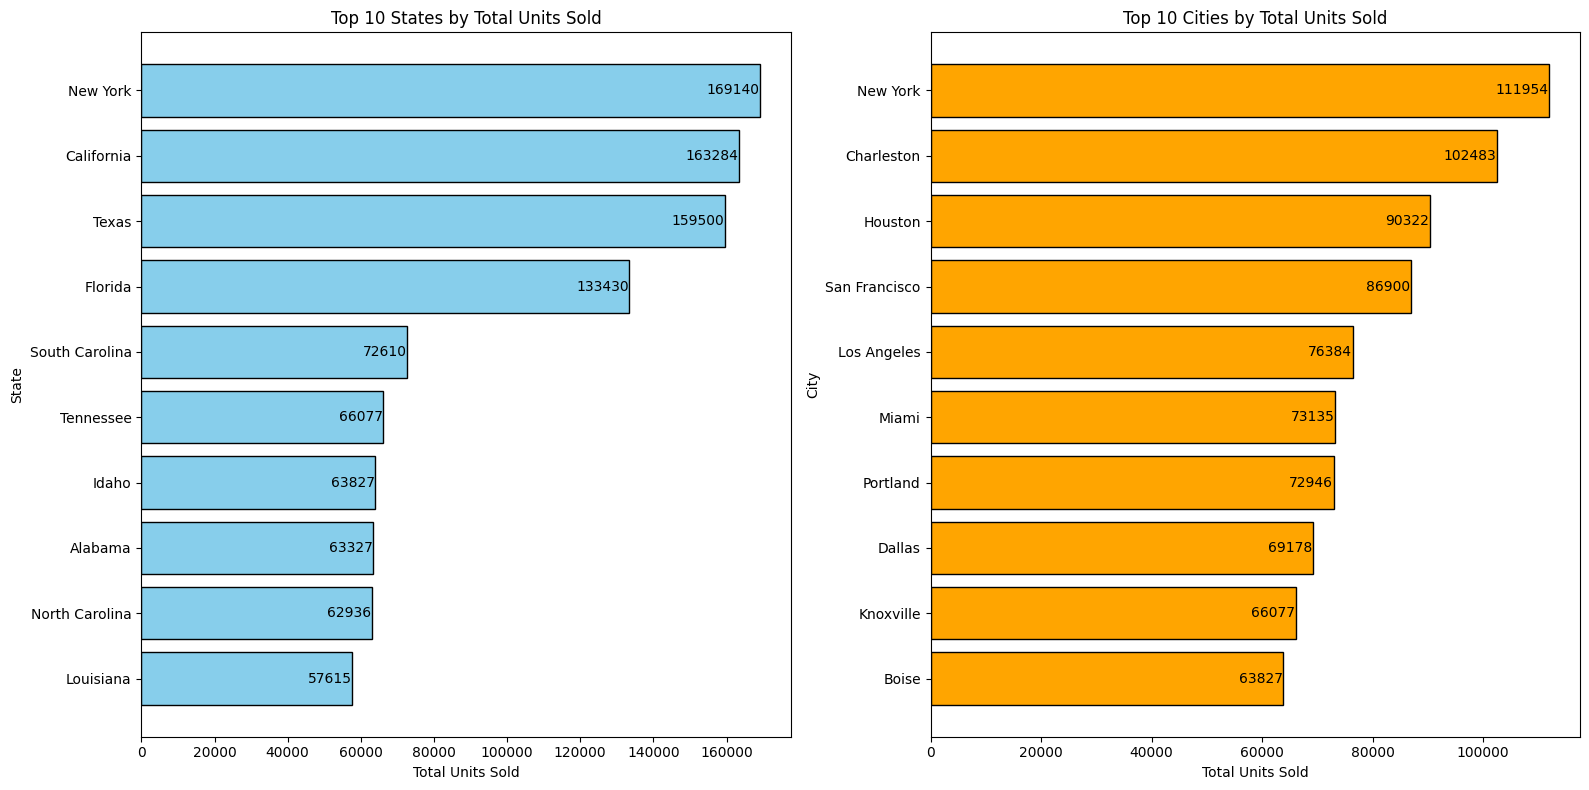

In [78]:
state_tot_units = df.groupby('State')['Units Sold'].sum().nlargest(10).sort_values(ascending=True)
city_tot_units = df.groupby('City')['Units Sold'].sum().nlargest(10).sort_values(ascending=True)

fig, axes = plt.subplots(1, 2, figsize=(16, 8))

bars1 = axes[0].barh(state_tot_units.index, state_tot_units.values, color='skyblue', edgecolor='black')
axes[0].set_title('Top 10 States by Total Units Sold')
axes[0].set_xlabel('Total Units Sold')
axes[0].set_ylabel('State')

for bar in bars1:
    width = bar.get_width()
    axes[0].text(width - 45, bar.get_y() + bar.get_height() / 2,
                 f'{int(width)}', ha='right', va='center', fontsize=10, color='black')

bars2 = axes[1].barh(city_tot_units.index, city_tot_units.values, color='orange', edgecolor='black')
axes[1].set_title('Top 10 Cities by Total Units Sold')
axes[1].set_xlabel('Total Units Sold')
axes[1].set_ylabel('City')

for bar in bars2:
    width = bar.get_width()
    axes[1].text(width - 45, bar.get_y() + bar.get_height() / 2,
                 f'{int(width)}', ha='right', va='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()